<a href="https://colab.research.google.com/github/laasyarg/iris-data-set/blob/main/statistics_of_iris_data_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Nearest Neighbors (KNN)
#### The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.
#### The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. You may have heard the old adage, “Birds of a feather flock together.”
#### An object is classified by a majority vote of its neighbors with the new object being assigned to the class most common among its k nearest neighbors.
#### K is a positive integer, typically small: k = 3, 5, or 10.
#### KNN can do multiple (more than two) class predictions.
#### In binary (two-class) classification problems, it is helpful to choose k to be an odd number as this can avoid a tie vote.
### Import Python Libraries: Numpy, Pandas, Matplotlib, and sklearn


In [ ]:

# Import Python Libraries: NumPy and Pandas
import pandas as pd
import numpy as np

In [ ]:
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [ ]:
# Import scikit-Learn module for the algorithm/modeL: Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Import scikit-Learn module to split the dataset into train/ test sub-datasets
from sklearn.model_selection import train_test_split

In [ ]:
# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Import scikit-Learn module classification report to later use for information about how the system try to classify / lable each record
from sklearn.metrics import classification_report


#Ignore future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

## Description Iris Dataset
#### Data Set: Iris.csv Title: Iris Plants Database Updated Sept 21 by C. Blake -Added discrepancy information Sources:

#### Creator: RA_ Fisher
#### Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
#### Date: 1988
#### Relevant Information: This is perhaps the best-known database to be found in the pattern recognition literature. Fishers paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example)

#### The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

#### Predicted attribute: class of iris plant

#### Number of Instances: 150 (50 in each of three classes)

#### Number of predictors: 4 numeric, predictive attributes and the class Attribute Information:

#### 1.sepal length in cm
#### 2.sepal width in cm
#### 3.petal length in cm
#### 4.petal width in cm
#### 5.class:

### Load Iris Dataset

In [ ]:
# Specify location of the dataset
filename = "C:/Users/BHARADWAJ.S/Downloads/Iris (3).csv"
# Load the data into a Pandas DataFrame
df = pd.read_csv(filename)

### Preprocess the Dataset: Clean Data: Find & Mark Missing Values

In [ ]:
# mark zero values as missing or NaN
df[[ 'SepalLengthCm' , 'SepalWidthCm' , 'PetalLengthCm' ,'PetalWidthCm' ]] \
= df[['SepalLengthCm' , 'SepalWidthCm' ,'PetalLengthCm' , 'PetalWidthCm' ]].replace(0,np.NaN)
# count the number of NaN values in each column
print (df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### Perform the EDA on the dataset

In [ ]:
# get the dimensions or shape of the dataset
# i.e. number of records / rows X number of variables / columns
print(df.shape)

(150, 6)


In [ ]:
#get the data types of all the variables / attributes in the data set
print(df.dtypes)

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [ ]:
#return the first five records / rows of the data set
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
#return the summary statistics of the numeric variables / attributes in the data set
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
#class distribution i.e. how many records are in each class
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


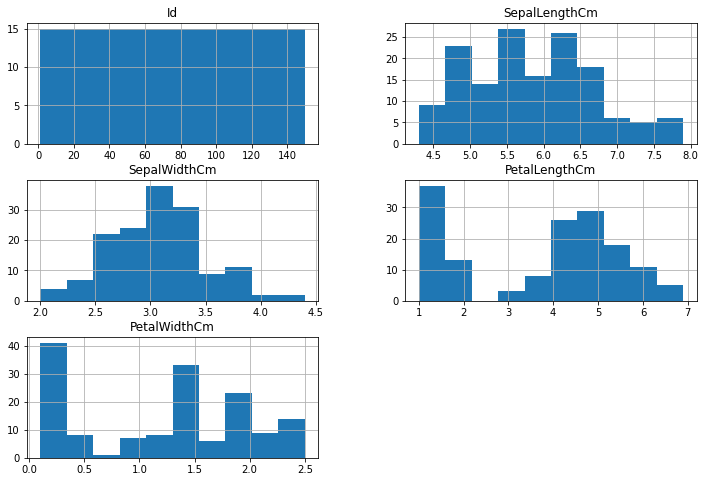

In [ ]:
#plot histogram of each numeric variable / attribute in the data set
df.hist(figsize=(12, 8))
pyplot.show()

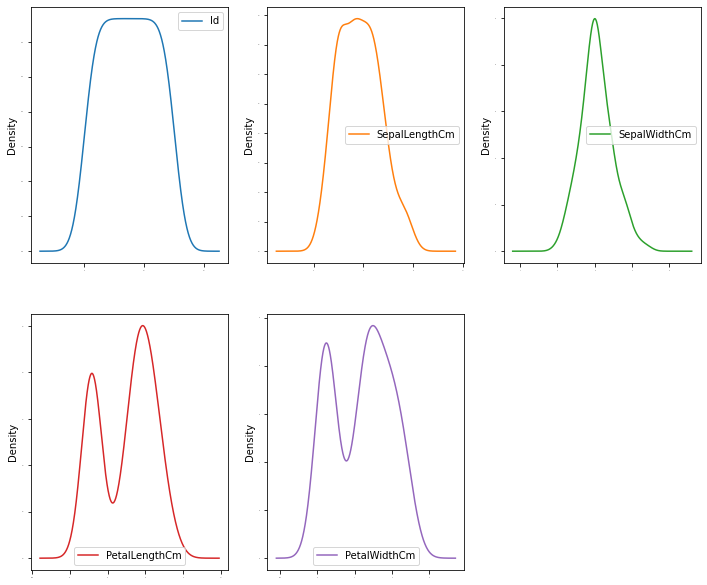

In [ ]:
# generate density plots of each numeric variable / attribute in the data set
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, legend=True, fontsize=1,
figsize=(12, 16))
pyplot.show()

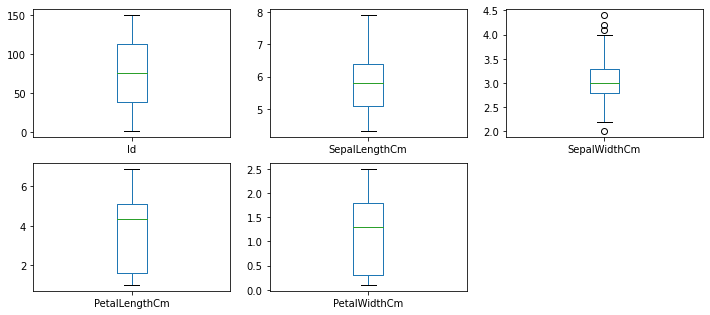

In [ ]:
# generate box plots of each numeric variable / attribute in the data set
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,8))
pyplot.show()

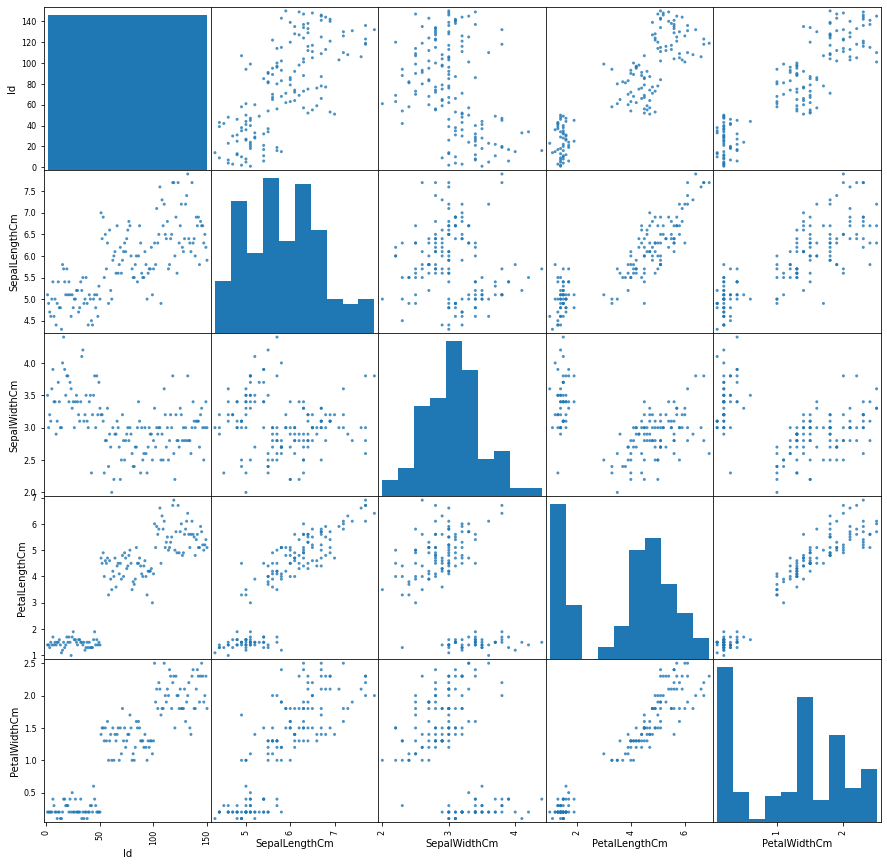

In [ ]:
# generate scatter plot matrix of each numeric variable / attribute in the data set
scatter_matrix(df, alpha=0.8, figsize=(15, 15))
pyplot.show()

### Separate Dataset into Input & Output NumPy Arrays

In [ ]:
# store dataframe values into a numpy array
array = df.values
# separate array into input and output by slicing
# for X(input) [:, 1:5] --> all the rows, columns from 1 - 4 (5 - 1)
# these are the independent variables or predictors
X = array[:,1:5]
# for Y(input) [:, 5] --> all the rows, column 5
# this is the value we are trying to predict
Y = array[:,5]

### Split Input/Output Arrays into Training/Testing Datasets

In [ ]:
# split the dataset --> training sub-dataset: 67%; test sub-dataset: 33%
test_size = 0.33
#selection of records to include in each data sub-dataset must be done randomly
seed = 7
#split the dataset (input and output) into training / test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

### Build and Train the Model
#### Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
#### Precision = TP/TP+FP

#### Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to all observations in the actual class.

#### Recall = TP/TP+FN

#### F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar costs. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

#### F1 Score = 2(Recall Precision) / (Recall + Precision)

In [ ]:
#build the model
model = KNeighborsClassifier()
# train the model using the training sub-dataset
model.fit(X_train, Y_train)
#print the classification report
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print("Classification Report: ", "\n", "\n", report)

Classification Report:  
 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.94      0.83      0.88        18

       accuracy                           0.92        50
      macro avg       0.93      0.93      0.93        50
   weighted avg       0.92      0.92      0.92        50



### Score the Accuracy of the Model
#### Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost the same. Therefore, you have to look at other parameters to evaluate the performance of your model.


In [ ]:
#score the accuracy leve
result = model.score(X_test, Y_test)
#print out the results
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 92.000%


### Classify/Predict the Model

In [ ]:
model.predict([[5.3, 3.0, 4.5, 1.5]])

array(['Iris-versicolor'], dtype=object)

### Evaluate the model using the 10-fold cross-validation technique.

In [ ]:
# evaluate the algorythm
# specify the number of time of repeated splitting, in this case 10 folds
n_splits = 10

# fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7

# split the whole dataset into folds
# In k-fold cross-validation, the original sample is randomly partitioned into k equal sized
#subsamples. Of the k subsamples, a single subsample is retained as the validation data for
#testing the model, and the remaining k − 1 subsamples are used as training data. The crossvalidation process is then repeated k times, with each of the k subsamples used exactly once as
#the validation data. The k results can then be averaged to produce a single estimation. The
#advantage of this method over repeated random sub-sampling is that all observations are used for
#both training and validation, and each observation is used for validation exactly once
kfold = KFold(n_splits, random_state=seed, shuffle=True)

# for logistic regression, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'

# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# print the evaluationm results
# result: the average of all the results obtained from the K-fold cross validation
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.953 (0.052)


### Compare this outcome to last week's Supervised Logistic Regression exercise and assess which model is superior.

## Homework Directions for Supervised Machine Learning: CART
### Discovery and Learning with Big Data/Machine Learning
### Gaddam Laasya Reddy
### Machine Learning Supervised CART
### CART Regression with Scikit-Learn: Overview

#### A decision tree builds regression or classification models in the form of a tree structure.

#### Regression trees are needed when the response variable is numeric or continuous.

#### In either case, the predictors or independent variables may be categorical or numeric. It is the target variable that determines the type of decision tree needed.

## Python: Scikit-Learn Library

#### The scikit-learn project started as scikit.learn, a Google Summer of Code project by David Cournapeau.

#### Its name stems from the notion that it is a "SciKit' (SciPy Toolkit), a separately developed and distributed third-party extension to SciPy.

#### The original codebase was later rewritten by other developers:

#### In 2010 Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort, and Vincent Michel, all from INRIA, took leadership of the project.
#### They made the first public release on February the 1st 2010.
#### As of 2018, scikit-learn is under active development.
#### Scikit-leam provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. It is licensed under a permissive simplified BSD license and is distributed under many Linux distributions, encouraging academic and commercial use.

#### The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-leam.

#### This stack includes:

#### NumPy: Base n-dimensional array package
#### SciPy: Fundamental library for scientific computing
#### Matplotlib: Comprehensive 2D/3D plotting
#### IPython: Enhanced interactive console
#### Sympy: Symbolic mathematics
#### Pandas: Data structures and analysis

## K-Fold Cross-Validation
#### In K Fold cross-validation, the data is divided into k subsets.

#### One of the k subsets is used as the test set/ validation set and the other k-l subsets are put together to form a training set.

#### The error estimation is averaged over all k trials to get the total effectiveness of our model.

#### In the following illustration K-Fold = 4

## Negative Mean Squared Error (Negative MSE)
#### In statistics, the mean squared error (MSE) or mean squared deviation (MSD) of an estimator ( a procedure for estimating an unobserved quantity) measures the average of the squares of the errors or deviation, i.e., the difference between the estimator and what is estimated.

#### MSE is a risk function, corresponding to the expected value of the squared error loss or quadratic loss.

#### The difference occurs because of randomness or because the estimator doesn't account for information that could produce a more accurate estimate.

#### The MSE is a measure of the quality of an estimator.

#### In the general case, it is non-negative, and values closer to zero are better.

#### IMPORTANT NOTES: In scikit-learn, mean squared error values are inverted, i.e., negative

#### Data Set is the housing_boston.csv
#### We will investigate the Boston House Price dataset as you did with the linear regression homework. Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are defined as follows:

#### CRIM: per capita crime rate by town
#### ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
#### INDUS: proportion of non-retail business acres per town
#### CHAS: Charles River dummy variable (= 1 tract bounds river; 0 otherwise)
#### NOX nitric oxides concentration (parts per 10 million)
#### RM: average number of rooms per dwelling
#### AGE: proportion of owner-occupied units built prior to 1940
#### DIS weighted distances to five Boston employment centers
#### RAD: index of accessibility to radial highways
#### TAX: full-value property-tax rate per 10,000 dollars
#### PTRATIO: pupil-teacher ratio by town
#### AA: 1000(AA -0:63)^2 where AA is the proportion of African Americans by town
#### LSTAT: % lower status of the population
#### MEDV: Median value of owner-occupied homes in 1000 dollars.
#### Note: For this assignment, we use a subset of the original dataset.

#### CRIM: per capita crime rate by town
#### INDUS: proportion of non-retail business acres per town
#### TAX: full-value property-tax rate per 10,000 dollars
#### MEDV: Median value of owner-occupied homes in 1000 dollars.
#### Import Libraries

In [ ]:
# Import Python Libraries: NumPy and Pandas

import pandas as pd
import numpy as np

# Import Libraries & modules for data visualization

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import scit-Learn module for the algorithm/model: DecisionTreeRegressor

from sklearn. tree import DecisionTreeRegressor
from sklearn import tree
!pip install graphviz
import graphviz

 # Import scikit-Learn module to split the dataset into train/ test sub-datasets

from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross-validation - algorithm/modeL evaluation & validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Load Data

In [ ]:
# Specify location of the dataset.  Be sure to  NOT  use the housing_boston_w_hdrs.csv!

housingfile = "C:/Users/BHARADWAJ.S/Downloads/housing boston (2).csv"

In [ ]:
# Load the data into a Pandas DataFrame

df= pd.read_csv (housingfile, header=None)

In [ ]:
# Specify the fields with their names

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA',
'LSTAT', 'MEDV']

# Load the data into a Pandas DataFrame

df = pd.read_csv(housingfile, names=names)

In [ ]:
#  Look at the first 5 rows of data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Preprocess the Dataset:
### Clean Data: Find & Mark Missing Values

In [ ]:
df.isnull().sum()

# We see there are no missing data points

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# Now let's say we want to decrease the amount of variables in our heatmap.  We would use the following code.  This will be on the final!
#  Remember how to make a subset.  Try using different variables.

df2= df[['CRIM','INDUS', 'TAX','MEDV']]

# We will use df2 for the rest of the calculations.

In [ ]:
df2.head()

,CRIM,INDUS,TAX,MEDV
0,0.00632,2.31,296,24.0
1,0.02731,7.07,242,21.6
2,0.02729,7.07,242,34.7
3,0.03237,2.18,222,33.4
4,0.06905,2.18,222,36.2


## Performing the Exploratory Data Analysis (EDA)

In [ ]:
# Get the number of records/rows, and the number of variables/columns

print(df2.shape)

(452, 4)


In [ ]:
# Get the data types of all variables

print(df2.dtypes)

CRIM     float64
INDUS    float64
TAX        int64
MEDV     float64
dtype: object


In [ ]:
# Obtain the summary statistics of the data

print(df2.describe())

             CRIM       INDUS         TAX        MEDV
count  452.000000  452.000000  452.000000  452.000000
mean     1.420825   10.304889  377.442478   23.750442
std      2.495894    6.797103  151.327573    8.808602
min      0.006320    0.460000  187.000000    6.300000
25%      0.069875    4.930000  276.750000   18.500000
50%      0.191030    8.140000  307.000000   21.950000
75%      1.211460   18.100000  411.000000   26.600000
max      9.966540   27.740000  711.000000   50.000000


## Create a Histogram

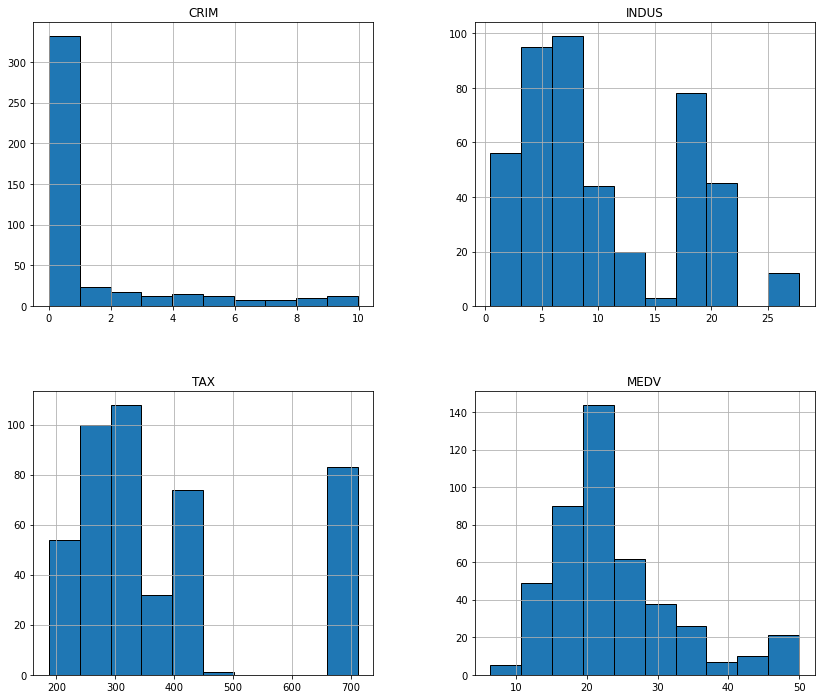

In [ ]:
# Plot histogram for each variable. I encourage you to work with the histogram. Remember what you did in the previous homework.

df2.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

## Scatter Matrix Plot

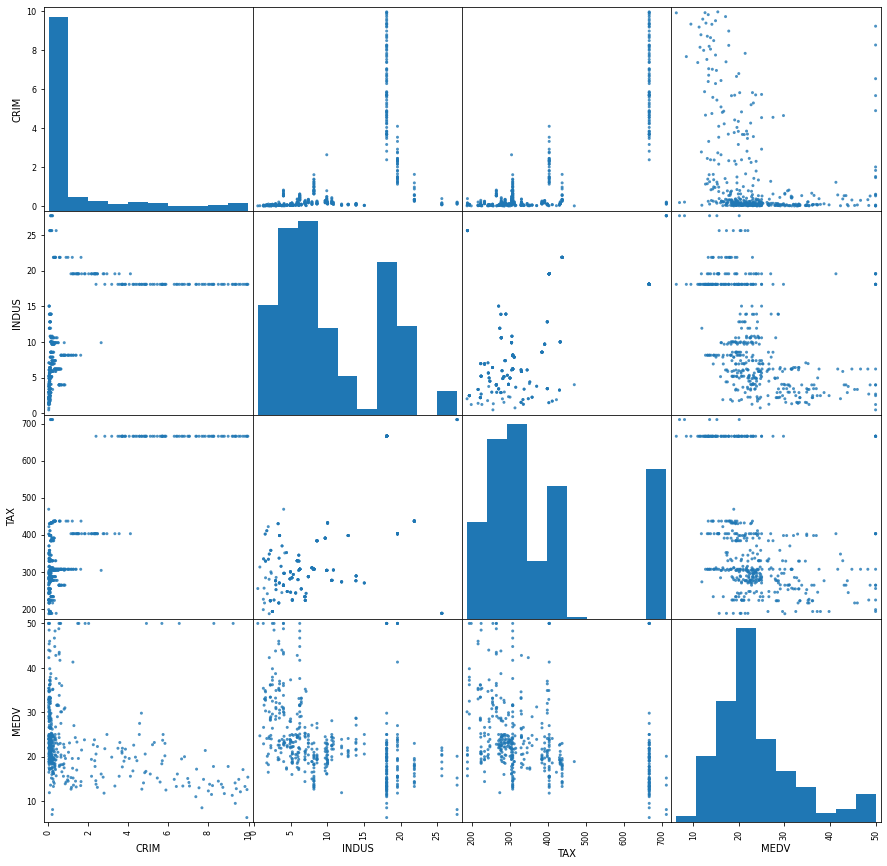

In [ ]:
# Create scatter plot matrix

scatter_matrix(df2, alpha=0.8, figsize=(15, 15))
pyplot.show()

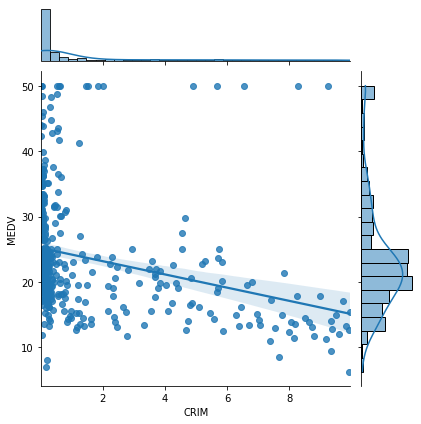

In [ ]:
sns.jointplot(data=df2, x="CRIM", y="MEDV", kind="reg")

## Join Plots with Seaborn

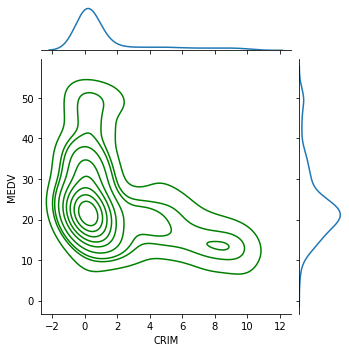

In [ ]:
#Join plot with CRIM and MEDV

sns.jointplot(x = 'CRIM', y = 'MEDV', data = df2, kind = 'kde', height = 5, joint_kws={'color':'green'})
plt.show()

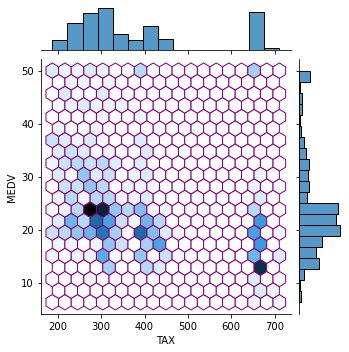

In [ ]:
#Join plot with TAX and MEDV

sns.jointplot(x = 'TAX', y = 'MEDV', data = df2, kind = 'hex', height = 5, joint_kws={'color':'purple'})
plt.show()

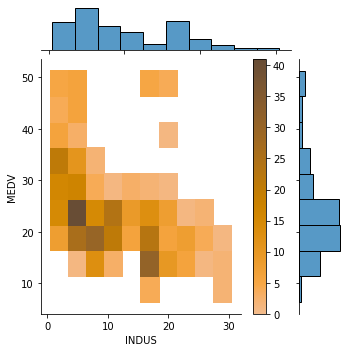

In [ ]:
# Join plot with TAX and MEDV

sns.jointplot(x = 'INDUS', y = 'MEDV', data = df2, kind = 'hist', height = 5, joint_kws={'color':'orange'}, binwidth=(3,5), cbar=True)
plt.show()

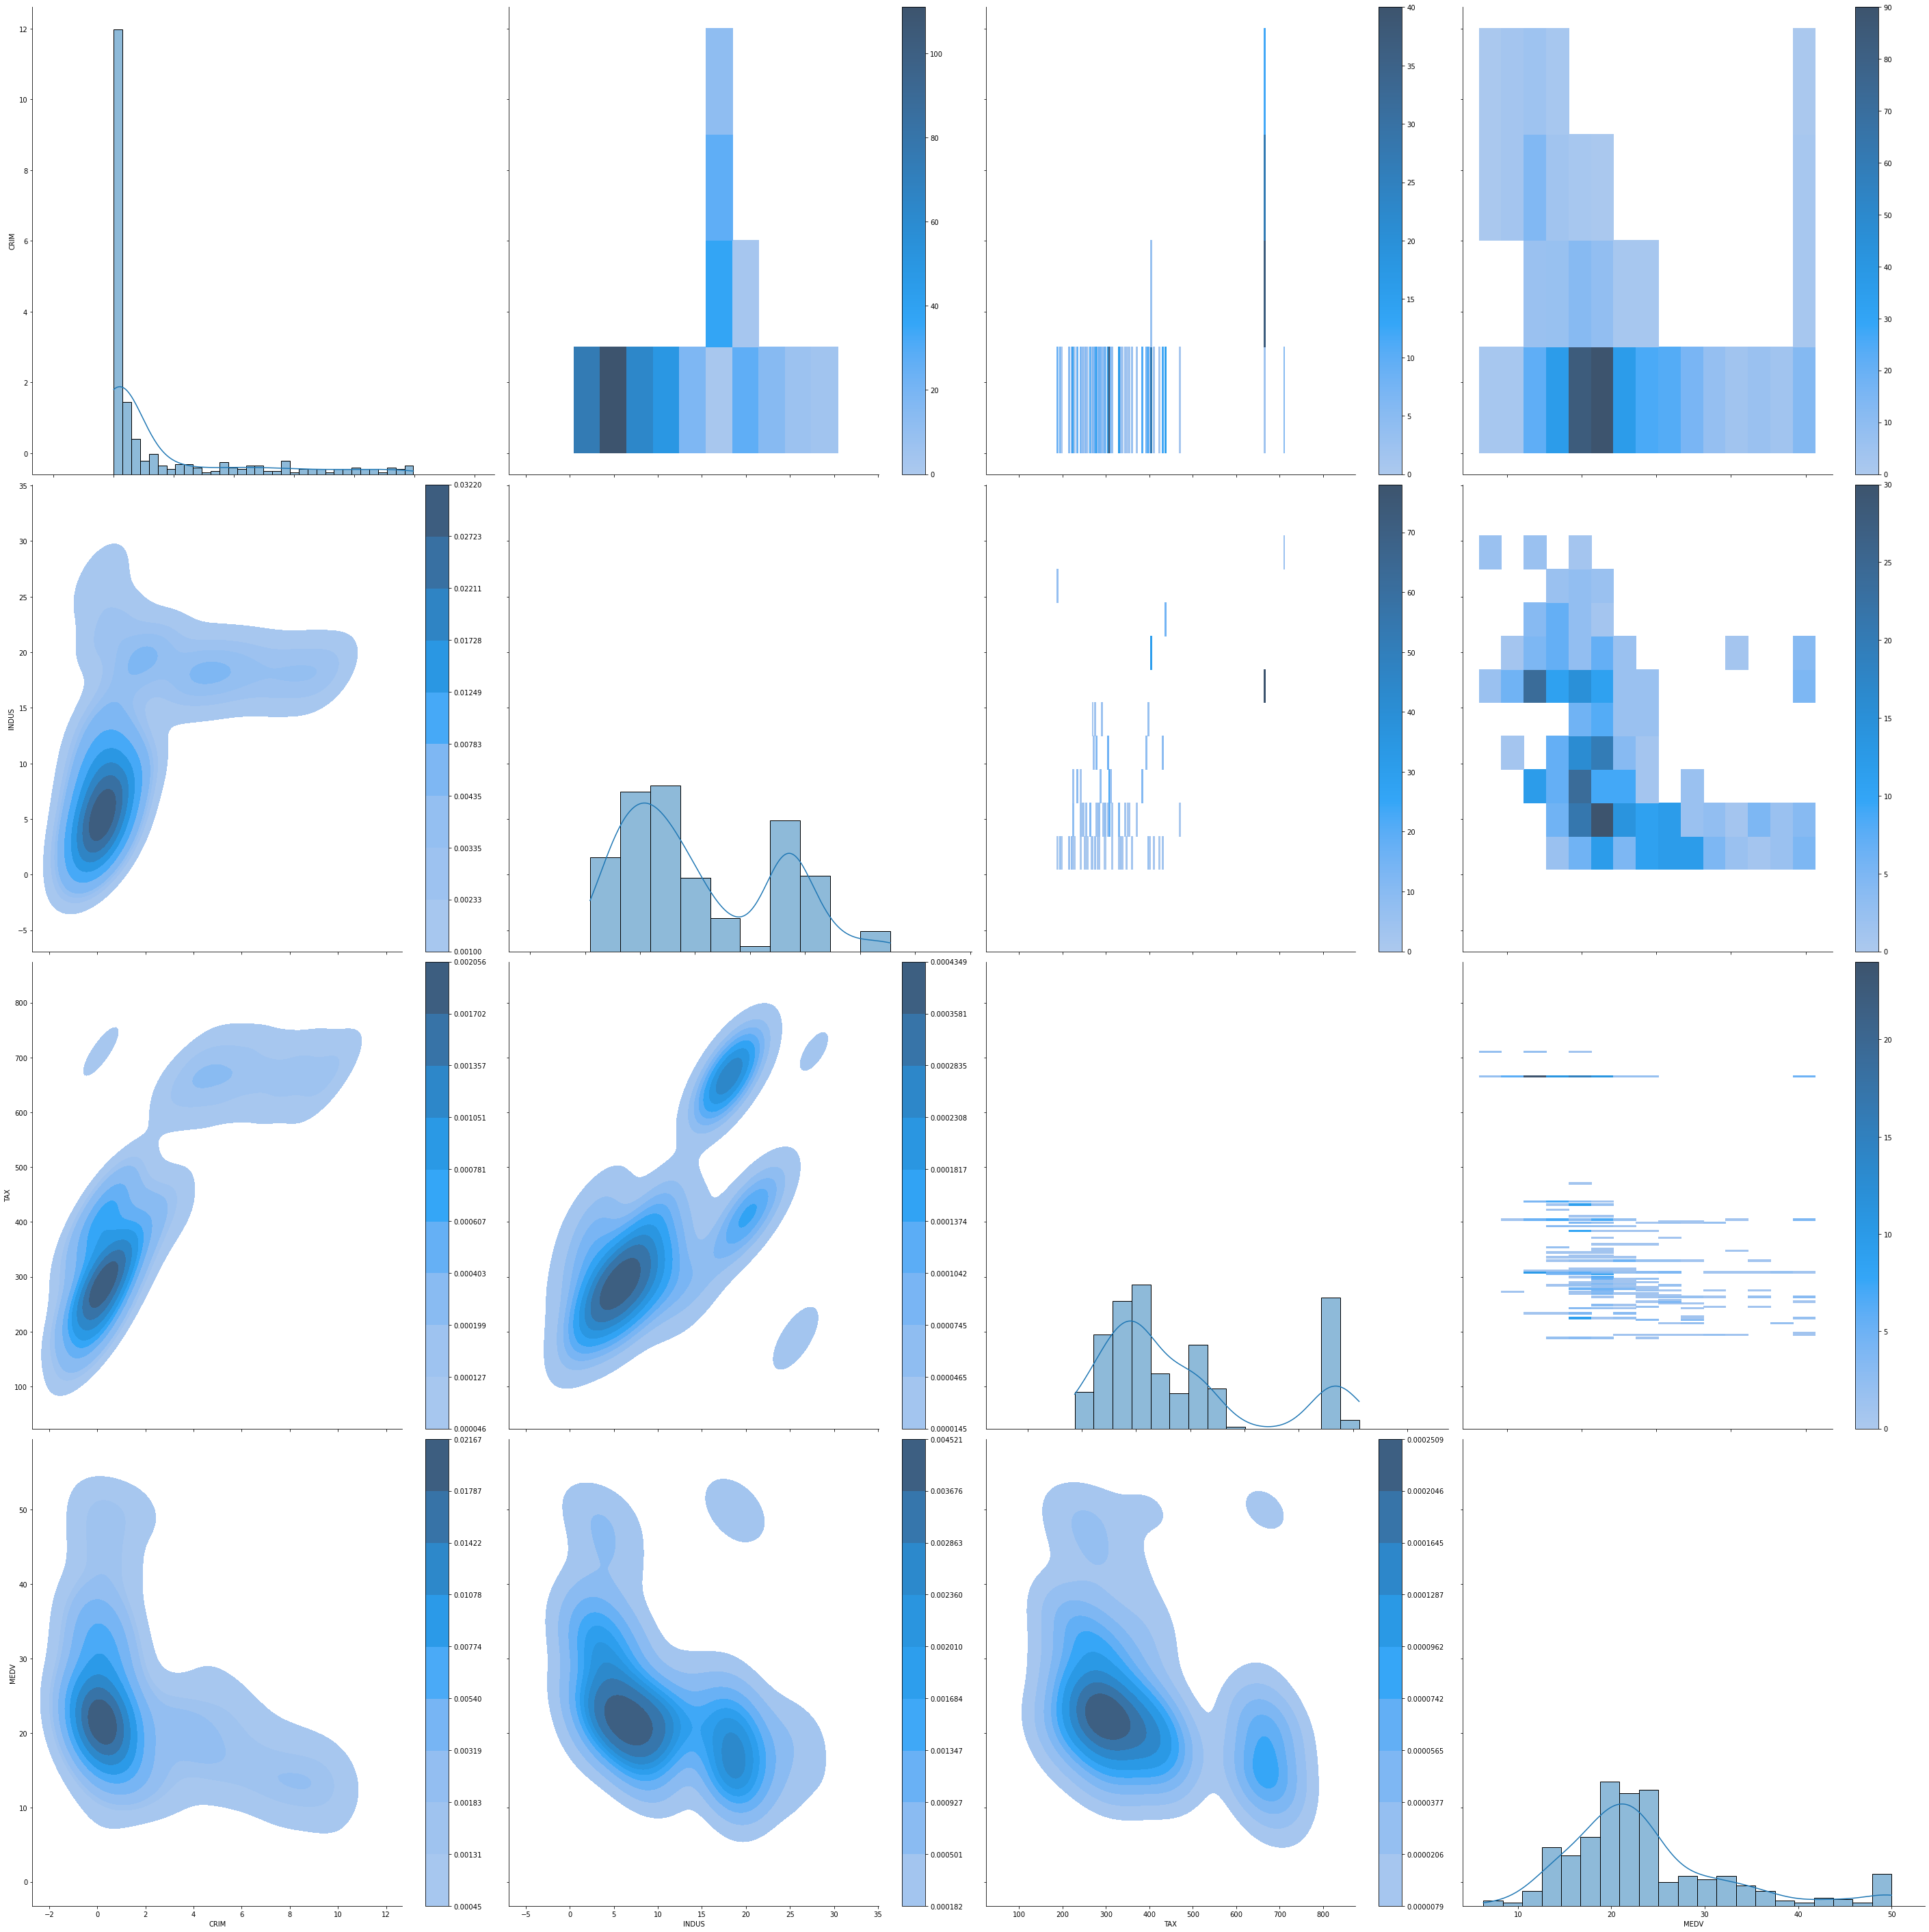

In [ ]:
# Now we will combine the join plots

g = sns.PairGrid(df2, height= 10)
g.map_upper(sns.histplot, bins= 20, binwidth=3, cbar=True)
g.map_lower(sns.kdeplot, fill=True, cbar=True)
g.map_diag(sns.histplot, kde=True, cbar=True)

## Separate Dataset into Input & Output Arrays

In [ ]:
# Store the dataframe values into a numPy array

array = df2.values

# Separate the array into input and output components by slicing (you used this in your Python fundamental homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 3

X = array [:, 0:3]

# For Y (output) [:3] --> All the rows in the last column (MEDV)

Y = array [:,3]

## Split into Input/Output Array into Training/Testing Datasets

In [ ]:
# Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

## Build and Train the Model

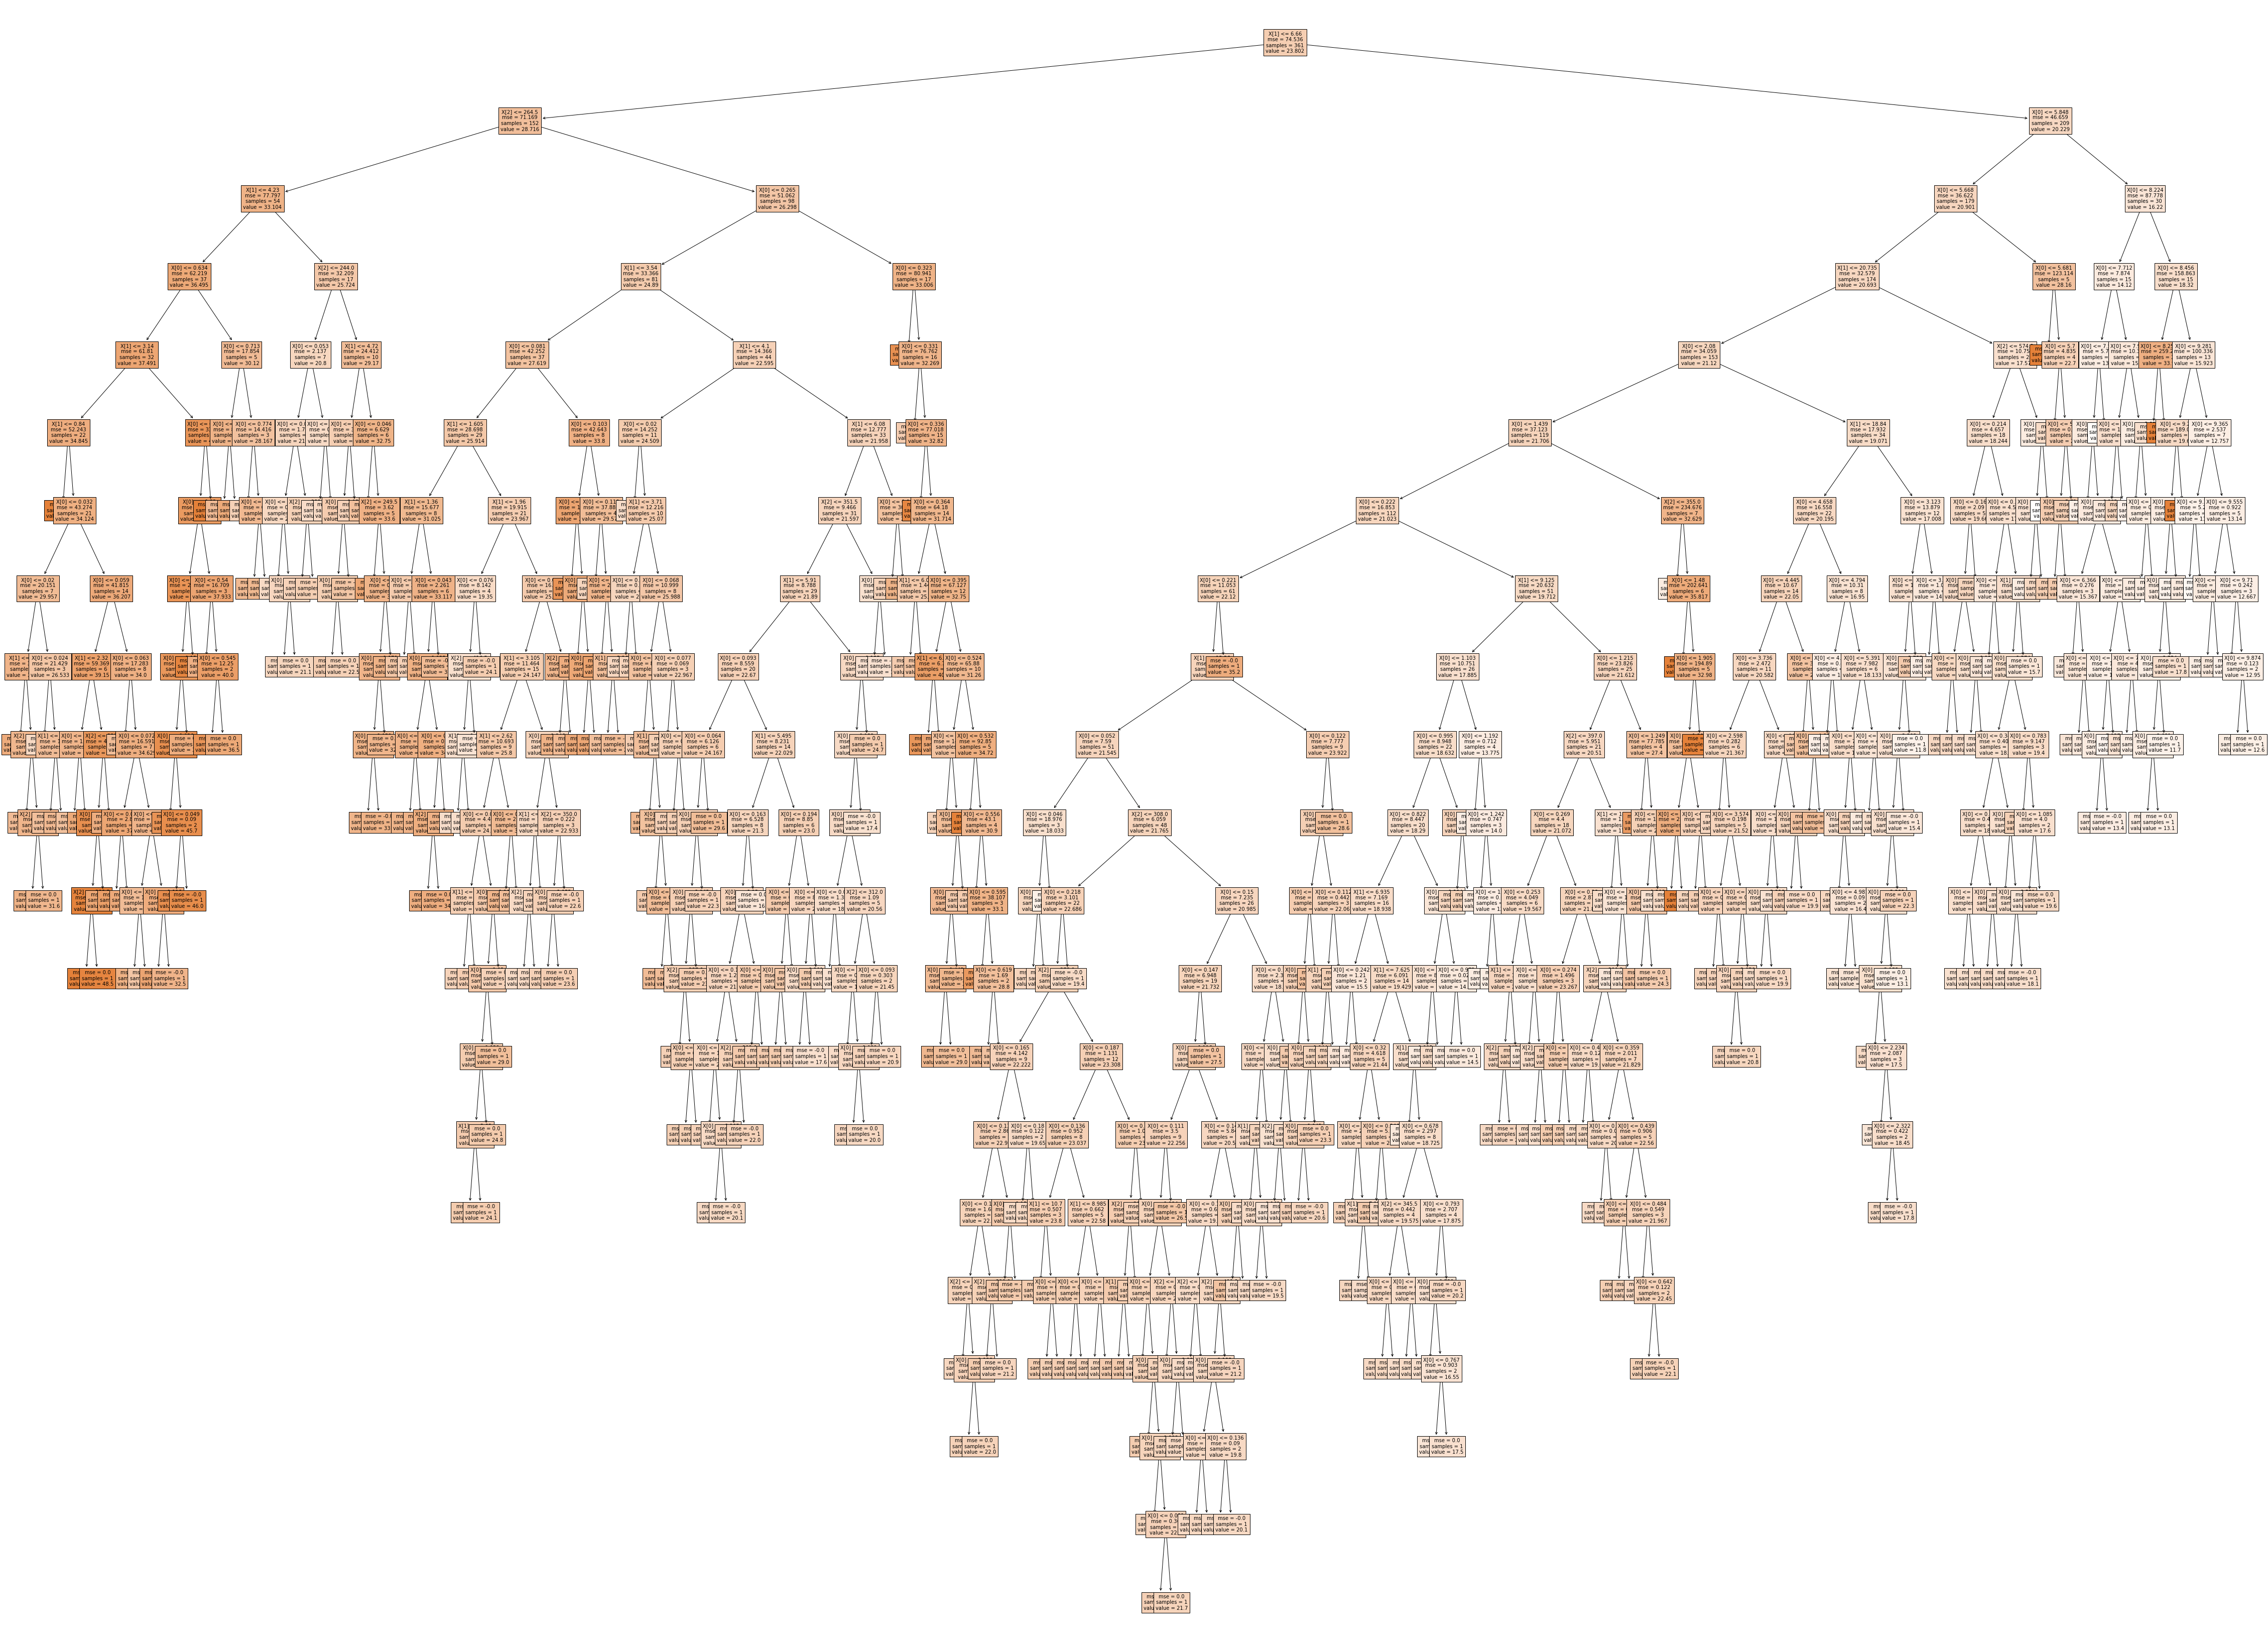

In [ ]:
# Build the model

model = DecisionTreeRegressor(random_state=seed)

# Train the model using the training sub-dataset

model.fit(X_train,Y_train)

# Non-Linear --> NO coefficients and the intercept

DecisionTreeRegressor (criterion='mse', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_split=100, min_weight_fraction_leaf=0.0, random_state=seed, splitter='best')

fig = plt.figure(figsize=(80,60))
tree.plot_tree(model, feature_names=None, class_names=None, filled=True, fontsize=10)
plt.show()

## Calculate R-Squared

In [ ]:
R_squared = model.score(X_test, Y_test)
print('R-Squared = ', R_squared)

R-Squared =  0.24948500553354236


#### Notes: The higher the R-squared, the better (0 – 100%). Depending on the model, the best models score above 83%. The R-squared value tells us how well the independent variables predict the dependent variable. This is very low. Think about how you could increase the R-squared. What variables would you use? This will be important for the final.
#### Model Prediction

In [ ]:
model.predict([[12,10,450]])

array([12.6])

In [ ]:
model.predict([[2,30,50]])

array([15.7])

## We have now trained the model. Let’s use the trained model to predict the “Median value of owner-occupied homes in 1000 dollars” (MEDV).
## We are using the following predictors for the 1st prediction:
#### CRIM: per capita crime rate by town: 12
#### INDUS: proportion of non-retail business acres per town: 10
#### TAX: full-value property-tax rate per $10,000: 450
Notes: So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $12,600.
### We are using the following predictors for the 2nd prediction:
#### CRIM: per capita crime rate by town: 2
#### INDUS: proportion of non-retail business acres per town: 30
#### TAX: full-value property-tax rate per $10,000: 50
## Notes: So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $15,700.
## Evaluate/Validate Algorithm/Model, Using K-Fold Cross-Validation

In [ ]:
# Evaluate the algorithm
# Specify the K-size

num_folds = 10

# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm

scoring = 'neg_mean_squared_error'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())


Average of all results from the K-fold Cross Validation, using negative mean squared error: -76.82251835748792


## Notes: After we train, we evaluate. We are using K-fold to determine if the model is acceptable. We pass the whole set since the system will divide it for us.  This value would traditionally be a positive value but scikit reports this value as a negative value. If you want a positive number, you may calculate the square root of the Negative Mean Squared Error value.